<a href="https://colab.research.google.com/github/williamlidberg/Analyses-of-Environmental-Data-2/blob/main/modules/module_6/Assignment_6_geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geopandas
You can think of geopandas as pandas for vector data. By vector data I mean points, lines, polygons where each feature has a corresponding row in an attribute table. This is also refered to as tabular data. You have used geopandas in previous modules but the aim of this module is to prepare you for next module which is machine learning on vector data.

Start by installing geopandas and a few other packages

In [4]:
!pip install geopandas
!pip install matplotlib # for plotting
!pip install folium # for data exploration
!pip install mapclassify # for data exploration

# Reading and writing data
The best thing about geopandas is that i can handle multiple file types such as GeoPackage, GeoJSON, Shapefile. Shapefiles can only contain about 4 GB of data and since many modern datasets is much larger than that the industry is slowly moving over to GeoPackage. You can easily read all these datatypes with the geopandas command "read_file()"

Start by downloading some data to work with

### Download ditches

In [5]:
from urllib.request import urlretrieve
url = ('https://geodata.naturvardsverket.se/nedladdning/diken/Diken_Sverige/Diken_lansvis/Diken_K.zip')
filename = '/content/Diken_K.zip' # you need to adjust this path on your own computer if you are using anaconda.
urlretrieve(url, filename)
!unzip -o /content/Diken_K.zip -d /content/ditches

Archive:  /content/Diken_K.zip
  inflating: /content/ditches/Diken_K.gpkg  


### Download wetlands

In [6]:
from urllib.request import urlretrieve
url = ('https://geodata.naturvardsverket.se/nedladdning/VMI/ursprunglig_digitalisering/K_Blekinge_VMI.zip')
filename = '/content/K_Blekinge_VMI.zip' # you need to adjust this path on your own computer if you are using anaconda.
urlretrieve(url, filename)
!unzip -o '/content/K_Blekinge_VMI.zip' -d /content/wetlands

Archive:  /content/K_Blekinge_VMI.zip
  inflating: /content/wetlands/K_Blekinge_VMI_Punkter.dbf  
  inflating: /content/wetlands/K_Blekinge_VMI_Punkter.prj  
  inflating: /content/wetlands/K_Blekinge_VMI_Punkter.shp  
  inflating: /content/wetlands/K_Blekinge_VMI_Punkter.shp.xml  
  inflating: /content/wetlands/K_Blekinge_VMI_Punkter.shx  
  inflating: /content/wetlands/K_Blekinge_VMI_Ytor.dbf  
  inflating: /content/wetlands/K_Blekinge_VMI_Ytor.prj  
  inflating: /content/wetlands/K_Blekinge_VMI_Ytor.shp  
  inflating: /content/wetlands/K_Blekinge_VMI_Ytor.shx  
  inflating: /content/wetlands/StandardRapporter.xls  
  inflating: /content/wetlands/VMI beskrivning 20190909.pdf  
  inflating: /content/wetlands/VMI Variabler.doc  


### Download protected areas

In [7]:
from urllib.request import urlretrieve
url = ('https://geodata.naturvardsverket.se/nedladdning/naturvardsregistret/biosfarsomraden.zip')
filename = '/content/biosfarsomraden.zip' # you need to adjust this path on your own computer if you are using anaconda.
urlretrieve(url, filename)
!unzip -o '/content/biosfarsomraden.zip' -d /content/protected

Archive:  /content/biosfarsomraden.zip
 extracting: /content/protected/BIOSFARSOMRADEN.cpg  
  inflating: /content/protected/BIOSFARSOMRADEN.dbf  
  inflating: /content/protected/BIOSFARSOMRADEN.prj  
  inflating: /content/protected/BIOSFARSOMRADEN.sbn  
  inflating: /content/protected/BIOSFARSOMRADEN.sbx  
  inflating: /content/protected/BIOSFARSOMRADEN.shp  
  inflating: /content/protected/BIOSFARSOMRADEN.shp.xml  
  inflating: /content/protected/BIOSFARSOMRADEN.shx  


### Read all data into geodataframes
All file types can be read with the same command.

In [8]:
import geopandas as gpd
ditches = gpd.read_file('/content/ditches/Diken_K.gpkg') # Note that this is a geopackage
wetlands = gpd.read_file('/content/wetlands/K_Blekinge_VMI_Ytor.shp')
protected = gpd.read_file('/content/protected/BIOSFARSOMRADEN.shp')

You can also write the geodataframes to different file types. For example to save the wetlands polygons to a geojson we can specify the driver as GeoJson.

In [6]:
wetlands.to_file("/content/wetlands.geojson", driver="GeoJSON")

## Task 1
Save the protected areas dataframe as a geopackage.

# Visalizing data
Geopandas includes a function to quickly inspect the data if the dataset is not too big. This works for the wetland polygons but it would probably crash google colab if you did this with the ditch dataframe. This is a very neat command to remember.



In [7]:
wetlands.explore(column="NVKLASS") # move over the polygons to see the attibutes.

# Selecting data by attributes
It's quite common to be interested in parts of the dataset during an analysis. In most GIS programs you can run a tool named something along the lines "select by attributes". Since geopandas builds on pandas this can easily be achived with Python as well.

Lets pretend that we want to investigate ditches but only forest ditches. We can then select or slice the dataframe by that attribute. In our case: Typ

In [8]:
ditches

OBJECTID  Dike_ID        Typ    Typ_2_3_4     Langd_m  Shape_Length  \
0              1        1  Skogsdike  Övrigt dike  122.475113    122.475113   
1              2        2  Skogsdike                 2.414214      2.414214   
2              3        3  Skogsdike                22.740989     22.740989   
3              4        4  Skogsdike                 3.000000      3.000000   
4              5        5  Skogsdike  Övrigt dike   90.789064     90.789064   
...          ...      ...        ...          ...         ...           ...   
282952    282953   282953  Skogsdike                12.846602     12.846602   
282953    282954   282954  Skogsdike  Övrigt dike   94.273362     94.273362   
282954    282955   282955  Skogsdike  Övrigt dike  129.007853    129.007853   
282955    282956   282956  Skogsdike               188.657746    188.657746   
282956    282957   282957  Skogsdike                96.324203     96.324203   

                                                 geometry  
0       LINESTRING (475852.500 6207476.500, 475853.214...  
1       LINESTRING (475843.500 6207474.500, 475842.500...  
2       LINESTRING (476071.500 6207424.500, 476074.500...  
3       LINESTRING (476095.500 6207419.500, 476097.000...  
4       LINESTRING (476025.500 6207416.500, 476025.500...  
...                                                   ...  
282952  LINESTRING (535609.500 6260303.500, 535607.786...  
282953  LINESTRING (535000.500 6260083.500, 535001.357...  
282954  LINESTRING (535145.500 6260014.500, 535142.500...  
282955  LINESTRING (535335.500 6260600.500, 535338.500...  
282956  LINESTRING (536074.500 6260604.500, 536071.500...  

[282957 rows x 7 columns]

In [9]:
forest_ditches = ditches[ditches["Typ"] == "Skogsdike"] # Skogsdike is Swedish for forest ditch

Sometimes we want to make multiple selections at the same time. This is where the & sign can be used. Let's select forest ditches that are longer than 500 meters by adding the lenght attribute to the selection.

In [10]:
forest_ditches_500m = ditches[(ditches["Typ"] == "Skogsdike") & (ditches["Langd_m"] > 500)] # Langd, or Längd is Swedish for length
forest_ditches_500m.explore()

### Task 2
Make a selection on the wetlands geodataframe and awsner the question: How many wetlands have a high nature value (Högt naturvärde), an area over 10 hectares and a perimiter less than 2000 meters.

# Spatial relations
One of the most commonly used operations within GIS is to select features from one dataset that falls within the features of another dataset. This is commonly refered to as spatial join or intersect.

Lets select all wetlands that fall within the protective area using geopandas.

In [11]:
selected_wetlands = gpd.sjoin(wetlands, protected, op='within')
selected_wetlands.explore(column="NVKLASS")

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


You can reverse this selection by using the ~ sign.

In [12]:
non_intersecting_wetlands = wetlands[~wetlands.index.isin(selected_wetlands.index)]
non_intersecting_wetlands .explore(column="NVKLASS")

The spatial join operation have many different options:
*   contains
*   within
*   touches
*   crosses
*   overlaps
*   equals

## Task 3
Use geopandas to select ditches that crosses the wetlands and then show them on a map.

# Math operations
Another common operation is to summarize the area/lenght or features that falls within other features. For example we can summarize the lenght of ditches within the wetlands.

In [17]:
joined_gdf = gpd.sjoin(ditches, wetlands, how="inner", op='intersects') # intersect ditches with wetlands
joined_gdf['line_length'] = joined_gdf.geometry.length # calculate lenght of intersected ditches
summary = joined_gdf.groupby('NVKLASS')['line_length'].sum() #summarize the lenght of ditch lines within each wetland (right refers to the right geodataframe in the intersect)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


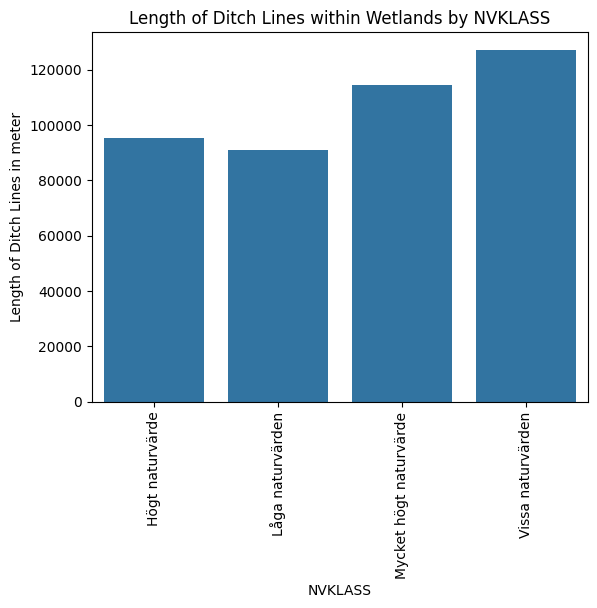

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=summary.index, y=summary.values)
plt.xlabel('NVKLASS')
plt.ylabel('Length of Ditch Lines in meter')
plt.title('Length of Ditch Lines within Wetlands by NVKLASS')
plt.xticks(rotation=90)
plt.show()


This does not tell us much since we dont take the size of each wetland into account. Lets extract the area of each wetland and devide the ditch lenght by wetland area.

In [19]:
import pandas as pd

wetlands['wetland_area'] = wetlands.geometry.area
joined_gdf = gpd.sjoin(ditches, wetlands, how="inner", op='intersects')
joined_gdf['line_length'] = joined_gdf.geometry.length
joined_gdf['length_per_unit_area'] = joined_gdf['line_length'] / joined_gdf['wetland_area']

summary = joined_gdf.groupby('NVKLASS')['length_per_unit_area'].sum()
summary = summary.reset_index()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


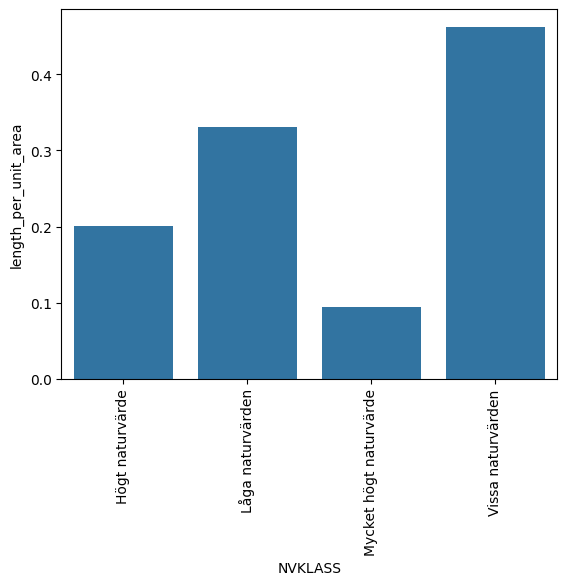

In [20]:
sns.barplot(x='NVKLASS', y='length_per_unit_area', data=summary)
plt.xticks(rotation=90)
plt.show()

# Buffers
Creating a buffer around features is also a very common tool for geospatial analysis.

In [ ]:
import geopandas as gpd

wetlands_buffer = wetlands.geometry.buffer(500) # buffer wetlands with 500 meters
wetlands_buffer_gdf = gpd.GeoDataFrame(geometry=wetlands_buffer) # create a new geodataframe from the buffered geometries

wetlands_buffer_gdf.explore()

If you look at the map you can see that some polygons are overlapping each other. Sometimes this is not what you want and in those cases they can be merged by dissolving the overlap.

In [ ]:
import geopandas as gpd

wetlands_buffer = wetlands.buffer(500)
singlepart = wetlands_buffer.unary_union # Dissolve overlapping buffers
singlepart = gpd.GeoDataFrame(geometry=[singlepart])
singlepart.crs = wetlands.crs # set crs to the new data
singlepart.explore()

## Task 4
Lets say we want to restore some drained wetlands but at the same time we dont want to destroy some cultural sites nearby. We can help with this by finding drained wetlands that do not have any cultural sites within 300 meters.  Download water-related cultural sites from [Länsstyrelsen](https://ext-geodatakatalog.lansstyrelsen.se/GeodataKatalogen/srv/swe/catalog.search#/search?isTemplate=n&referenceDateRange=%7B%22range%22:%7B%22referenceDateRange%22:%7B%22gte%22:null,%22lte%22:null,%22relation%22:%22within%22%7D%7D%7D&metadataDateRange=%7B%22range%22:%7B%22metadataDateRange%22:%7B%22gte%22:null,%22lte%22:null,%22relation%22:%22within%22%7D%7D%7D&metadataAndReferenceDateRange=%7B%22range%22:%7B%22metadataAndReferenceDateRange%22:%7B%22gte%22:null,%22lte%22:null,%22relation%22:%22within%22%7D%7D%7D&sortBy=relevance&sortOrder=&query_string=%7B%22spatialRepresentationType%22:%7B%22vector-point%22:true%7D,%22ownerOrgName%22:%7B%22L%C3%A4nsstyrelsen%20Blekinge%20l%C3%A4n%22:true%7D%7D&from=1&to=30) and select wetlands with some nature values (Vissa naturvärden) that are more than 300 meters away from cultural sites. Save the selected wetlands as a geopackage.

In [9]:
# You can download the data using urllib
from urllib.request import urlretrieve
url = ('https://ext-dokument.lansstyrelsen.se/gemensamt/geodata/ShapeExport/Lstk.Inventerade_vattenanknutna_kulturmiljoer.zip')
filename = '/content/Lstk.Inventerade_vattenanknutna_kulturmiljoer.zip' # you need to adjust this path on your own computer if you are using anaconda.
urlretrieve(url, filename)
!unzip -o '/content/Lstk.Inventerade_vattenanknutna_kulturmiljoer.zip' -d /content/culture

Archive:  /content/Lstk.Inventerade_vattenanknutna_kulturmiljoer.zip
  inflating: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.dbf  
  inflating: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.gpkg  
  inflating: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.prj  
  inflating: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.shp  
  inflating: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.shx  
 extracting: /content/culture/logga_col_254px.png  
 extracting: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.html  
 extracting: /content/culture/Lstk.Inventerade_vattenanknutna_kulturmiljoer.xml  
 extracting: /content/culture/ReadMe.html  


# Data aggregation
There is a global geospatial index based around nested hexagon polygons which is called H3. It was developed by [Uber](https://www.uber.com/en-SE/blog/h3/) and later made into open source for everyone to use.

* H3 is a hierarchical geospatial index.
* H3 was developed to address the challenges of Uber's data science needs.
* H3 can be used to join disparate data sets.
* In addition to the benefits of the hexagonal grid shape, H3 includes features for modeling flow.
* H3 is well suited to apply machine learning to geospatial data.

H3 can be very useful if you are working in an area and need to aggreagate multiple data soruces. Since the polygons have uniqe IDs and are constant for everyone you can easily share data with other people based on the H3 index.

Also, [hexagons are the bestagons](https://www.youtube.com/watch?v=thOifuHs6eY)

In [3]:
!pip install tobler
!pip install h3
!pip install h3pandas

First we need to select which geographical area we want to work with, start by downloading some Swedish regions from [SCB}(https://www.scb.se/hitta-statistik/regional-statistik-och-kartor/regionala-indelningar/digitala-granser/)


In [2]:
from urllib.request import urlretrieve
url = ('https://www.scb.se/contentassets/3443fea3fa6640f7a57ea15d9a372d33/shape_svenska_240104.zip')
filename = '/content/Sweden_shapefile.zip' # you need to adjust this path on your own computer if you are using anaconda.
urlretrieve(url, filename)
!unzip -o /content/Sweden_shapefile.zip -d /content/sweden
!unzip -o /content/sweden/LanSweref99TM.zip -d /content/sweden/lan

Archive:  /content/Sweden_shapefile.zip
 extracting: /content/sweden/Kommun_Sweref99TM.zip  
 extracting: /content/sweden/LanSweref99TM.zip  
 extracting: /content/sweden/LAregion_2021_Sweref99TM.zip  
Archive:  /content/sweden/LanSweref99TM.zip
  inflating: /content/sweden/lan/Lan_Sweref99TM_region.dbf  
  inflating: /content/sweden/lan/Lan_Sweref99TM_region.prj  
  inflating: /content/sweden/lan/Lan_Sweref99TM_region.shp  
  inflating: /content/sweden/lan/Lan_Sweref99TM_region.shx  


We can keep working with Blekinge since its so small and we already have some data for it.

<Axes: >

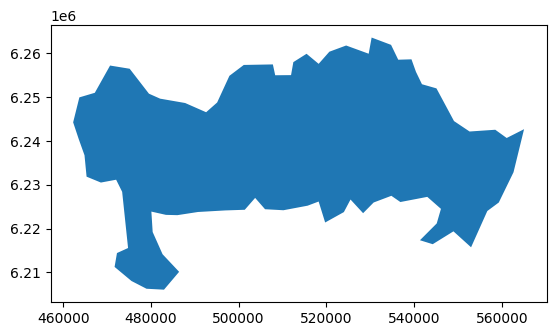

In [10]:
sweden = gpd.read_file('/content/sweden/lan/Lan_Sweref99TM_region.shp')
blekinge = sweden[sweden["LnNamn"] == "Blekinge"] # Skogsdike is Swedish for forest ditch
blekinge.plot()

With this polygon we can now call on the H3 api and create a hexagon index for Blekine. There are multiple resoltuions where the bigest hexagon is 4,357,449.41 km² and the smallest 0.895 m²

The resolution parameter goes from 0 to 15 but due to limited RAM on colab we will use 7 here.

In [13]:
import h3pandas
import tobler
blekinge_hexagons = tobler.util.h3fy(blekinge, resolution=7, clip=False, buffer=False, return_geoms=True)
blekinge_hexagons.explore()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:1293: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


Note the hex_id column. Different resolutions have different IDs but each polygon ID is uniqe which means that you can use it to join and share data based on this global ID.

In [16]:
blekinge_hexagons

geometry
hex_id                                                            
871f2e349ffffff  POLYGON ((471217.384 6231348.616, 471254.148 6...
871f28d13ffffff  POLYGON ((475227.492 6253292.718, 475264.575 6...
871f2e368ffffff  POLYGON ((467544.916 6236448.964, 467581.291 6...
871f28c12ffffff  POLYGON ((481462.424 6241221.652, 481500.180 6...
871f28569ffffff  POLYGON ((511253.706 6227484.763, 511294.503 6...
...                                                            ...
871f28136ffffff  POLYGON ((511629.204 6250961.683, 511669.967 6...
871f28cc1ffffff  POLYGON ((498070.883 6235406.186, 498110.329 6...
871f280f4ffffff  POLYGON ((530006.953 6229056.703, 530049.628 6...
871f28c54ffffff  POLYGON ((497716.218 6246190.306, 497755.594 6...
871f28074ffffff  POLYGON ((537758.459 6242347.195, 537801.881 6...

[706 rows x 1 columns]

Lets summarize the number of ditch lines within each hexagon.

In [40]:
import geopandas as gpd

# make sure that the coordinate system is the same
ditches  = ditches.to_crs(blekinge_hexagons.crs)

# Perform a spatial join
joined = gpd.sjoin(blekinge_hexagons, ditches, op='intersects', how='left')

# Group by hex_id and count the number of sites within each hexagon
summary = joined.groupby('hex_id').size().reset_index(name='ditch_count')

# Merge the summary with the hexagon GeoDataFrame to add the cnumber of sites within each hexagon
hexagons_with_sites = blekinge_hexagons.merge(summary, on='hex_id', how='left')
hexagons_with_sites.explore('ditch_count')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


However, since some ditches are longer than others it makes more sense to summarize the length of ditches instead of the number of line segments.

In [46]:
import geopandas as gpd

ditches = ditches.to_crs(blekinge_hexagons.crs)
joined = gpd.sjoin(blekinge_hexagons, ditches, op='intersects', how='left')

# Calculate the length of each ditch line
joined['line_length'] = joined.geometry.length

# Group by hex_id and sum the length of ditch lines within each hexagon
summary = joined.groupby('hex_id')['line_length'].sum().reset_index()
hexagons_with_ditch_length = blekinge_hexagons.merge(summary, on='hex_id', how='left')
hexagons_with_ditch_length.explore('line_length')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


Finally we aggregate more data to the hexagons. For example, lets also add the area of wetlands within each hexagon.

In [48]:

wetlands = wetlands.to_crs(hexagons_with_ditch_length.crs)
joined_wetlands = gpd.sjoin(hexagons_with_ditch_length, wetlands, op='intersects', how='left')

# Calculate the area of each wetland polygon
joined_wetlands['wetland_area'] = joined_wetlands.geometry.area

# Group by hex_id and sum the area of wetlands within each hexagon
summary_wetlands = joined_wetlands.groupby('hex_id')['wetland_area'].sum().reset_index()

hexagons_with_both_ditch_lenght_and_wetland_area = hexagons_with_ditch_length.merge(summary_wetlands, on='hex_id', how='left')
hexagons_with_both_ditch_lenght_and_wetland_area

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


hex_id                                           geometry  \
0    871f2e349ffffff  POLYGON ((471217.384 6231348.616, 471254.148 6...   
1    871f28d13ffffff  POLYGON ((475227.492 6253292.718, 475264.575 6...   
2    871f2e368ffffff  POLYGON ((467544.916 6236448.964, 467581.291 6...   
3    871f28c12ffffff  POLYGON ((481462.424 6241221.652, 481500.180 6...   
4    871f28569ffffff  POLYGON ((511253.706 6227484.763, 511294.503 6...   
..               ...                                                ...   
701  871f28136ffffff  POLYGON ((511629.204 6250961.683, 511669.967 6...   
702  871f28cc1ffffff  POLYGON ((498070.883 6235406.186, 498110.329 6...   
703  871f280f4ffffff  POLYGON ((530006.953 6229056.703, 530049.628 6...   
704  871f28c54ffffff  POLYGON ((497716.218 6246190.306, 497755.594 6...   
705  871f28074ffffff  POLYGON ((537758.459 6242347.195, 537801.881 6...   

      line_length  wetland_area  
0    1.887379e+06  4.220269e+06  
1    2.663294e+06  4.198538e+06  
2    1.226672e+06  4.213931e+06  
3    2.721345e+06  4.212866e+06  
4    3.097307e+06  4.235474e+06  
..            ...           ...  
701  2.360573e+06  4.211095e+06  
702  2.172070e+06  4.223559e+06  
703  2.890967e+06  4.239026e+06  
704  2.521847e+06  8.424437e+06  
705  2.879415e+06  4.227292e+06  

[706 rows x 4 columns]

### Task 5
Add the number of cultural sites to these hexagons so you get ditch length, wetlands area and number of cultural sites within the same geodataframe.

# Conclusions
Geopandas is a powerful tool to wrangle geospatial vector data and can read and write multiple different file formats. Aggrigating data is very useful for further analyses and we will use this skill in the next module to combine aggregated vector data with machine learning and implement the model to predict things on the H3 geospatial index. Here is an example of how it can be used in the real world: https://beta.behovskartan.se/